# Analysis of the Delta Airlines Stock Prices from 2013 to 2017

This Python 3 notebook uses data from Delta Airlines Stock Prices to analyse the following:
- The average stock prices across each year
- The effect of time of year, month and day on stock prices
- The effect of major airline crashes on DA stock prices.

Dataset found here: http://mlg.ucd.ie/modules/COMP30760/stocks/dal.html

## Preparation

I began by importing all the Python libraries I would need for later

In [232]:
import urllib.request
import bs4
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Data Collection

I started by scraping the HTML data from the page. For this, I used the urllib library and made a request to the webpage containg the data I wished to extract. I then outputted the data so I could evaluate what data I needed to parse.

In [233]:
link = "http://mlg.ucd.ie/modules/COMP30760/stocks/dal.html"
response = urllib.request.urlopen(link)
html = response.read().decode()
lines = html.strip().split("\n")
for l in lines:
    print(l)

<html>
<head>
<title>5 year daily price data for DAL</title>
<meta name='robots' content='noindex'>
<meta charset='utf-8'>
<meta name='viewport' content='width=device-width, initial-scale=1'>
<link rel='stylesheet'  target='_blank' href='http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css'>
<script src='https://ajax.googleapis.com/ajax/libs/jquery/1.11.3/jquery.min.js'></script>
<script src='http://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/js/bootstrap.min.js'></script>
</head>
<body>
<div class='container'>
<h1>Historical Data: DAL</h1>
<hr>
<p>Opening, high, low, and closing prices during each day for this stock.</p>


<h3>Year: 2013</h3>
<table width='90%' class='table table-condensed table-striped'>
<thead><tr><td>Day</td><td>Month</td><td>Year</td><td>Open</td><td>High</td><td>Low</td><td>Close</td></tr></thead>
<tbody>

<tr><td>02</td><td>01</td><td>2013</td><td>12.07</td><td>12.28</td><td>11.97</td><td>12.23</td></tr>
<tr><td>03</td><td>01</td><td>2013</td><td>12.

## Data Parsing

I parsed the data using the Beautiful Soup library to extract the data contained within the table tags. Then I outputted it to ensure all the data was correct. I noticed that their were 5 tables on the HTML page each corresponding to a year.

In [234]:
parser = bs4.BeautifulSoup(html, "html.parser")
for match in parser.find_all("table"):
    text = match.get_text()
    print(text)


DayMonthYearOpenHighLowClose

0201201312.0712.2811.9712.23
0301201312.1412.6112.1212.58
0401201312.5613.0812.5512.98
0701201313.1413.3812.8912.99
0801201313.0513.2612.8712.98
090120131313.1612.8913.11
1001201313.4513.6513.1713.3
1101201313.3313.4113.0913.35
1401201313.313.4913.1713.44
1501201313.2513.7413.2113.63
1601201313.5514.1113.5213.92
1701201313.951413.7213.83
1801201313.8513.9113.613.61
2201201313.6414.1513.4614.01
2301201314.0514.1513.7413.78
2401201313.8314.1713.7113.93
2501201313.9414.1813.8214.17
2801201314.1614.213.913.94
2901201313.8913.9313.6113.68
3001201313.7213.9213.6813.84
3101201313.7713.9213.7213.89
0102201313.9714.0913.7413.82
0402201313.6413.9513.4413.86
0502201313.8314.113.813.93
0602201313.9114.4913.9114.47
0702201314.4914.8914.4614.86
0802201314.7714.8814.5214.62
1102201314.6614.914.6114.69
1202201314.6414.7914.4614.5
1302201314.5714.814.514.78
1402201314.614.6814.0214.24
1502201314.3714.5614.3114.45
1902201314.414.6214.214.3
2002201314.2914.3213.7813.82
2102

I converted the html page into a DataFrame by placing each table into individual dataframes then combining them together to form one master DataFrame

In [124]:
df1 = pd.read_html(link)[0]
df2 = pd.read_html(link)[1]
df3 = pd.read_html(link)[2]
df4 = pd.read_html(link)[3]
df5 = pd.read_html(link)[4]
df = pd.concat([df1, df2, df3, df4, df5])

I combined the Day, Month and Year columns into Date then converted it to a datetime type. Then I reassigned it as the index. As the index is a datetime type, this DateFrame is now a Time Series.

In [125]:
df['Date'] = df['Month'].map(str)+"-"+df['Day'].map(str)+"-"+df['Year'].map(str)
del df['Day'], df['Month'], df['Year']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date')

,Open,High,Low,Close
Date,,,,
2013-01-02,12.070000,12.280000,11.970000,12.230000
2013-01-03,12.140000,12.610000,12.120000,12.580000
2013-01-04,12.560000,13.080000,12.550000,12.980000
2013-01-07,13.140000,13.380000,12.890000,12.990000
2013-01-08,13.050000,13.260000,12.870000,12.980000
2013-01-09,13.000000,13.160000,12.890000,13.110000
2013-01-10,13.450000,13.650000,13.170000,13.300000
2013-01-11,13.330000,13.410000,13.090000,13.350000
2013-01-14,13.300000,13.490000,13.170000,13.440000


## Data Analysis

### Average stock prices across the years

To analyse the dataset, I began by describing the dataset to get an idea of the distribution of data.

In [126]:
df.describe()

,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,39.367228,39.866974,38.850858,39.356878
std,11.270163,11.350512,11.169865,11.250157
min,12.070000,12.280000,11.970000,12.230000
25%,34.119998,34.649999,33.444999,33.975001
50%,42.950001,43.520000,42.400002,42.950001
75%,47.855000,48.500000,47.299999,47.810001
max,56.529999,56.840000,55.990002,56.430000


I looked at the mean data of each year to get a sense of the trend of the data. I noted that there a strong positive trend in the data

In [127]:
df2013 = df[df['Date'].dt.year == 2013]
df2014 = df[df['Date'].dt.year == 2014]
df2015 = df[df['Date'].dt.year == 2015]
df2016 = df[df['Date'].dt.year == 2016]
df2017 = df[df['Date'].dt.year == 2017]

In [128]:
df2013.mean()

Open     19.990119
High     20.306190
Low      19.701706
Close    20.004802
dtype: float64

In [129]:
df2014.mean()

Open     37.610952
High     38.131865
Low      37.052222
Close    37.614921
dtype: float64

In [130]:
df2015.mean()

Open     46.149326
High     46.737897
Low      45.489048
Close    46.113492
dtype: float64

In [131]:
df2016.mean()

Open     43.125873
High     43.704087
Low      42.548571
Close    43.113254
dtype: float64

In [132]:
df2017.mean()

Open     50.002072
High     50.497012
Low      49.505020
Close    49.980080
dtype: float64

Here is the data represented in graphical form. The trend is clearly observed.

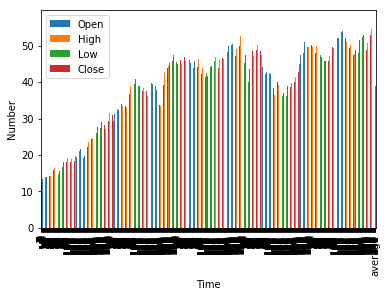

In [154]:
average = df.mean()
average.name = 'average'
df_avg = df.append(average)
df_avg.plot(kind='bar', xticks=df["Date"].dt.year)
plt.xlabel("Time")
plt.ylabel("Number")
plt.show()

As we can see from this graph, there appears to be a drop periodically, therefore I decided to analyse the trend for the months.

### The effect of year, month and day on stock prices

In [162]:
df_months = df.groupby(df['Date'].dt.month)['High'].mean()
df_months.nlargest(12)

Date
12    46.629434
11    43.967822
10    40.792703
3     39.245185
6     39.208411
9     39.164078
5     38.942359
7     38.760943
8     38.421091
1     37.920198
2     37.828125
4     37.394904
Name: High, dtype: float64

We find that months with the lowest average "High" value are months that appear at the start of the year (January, February, April) while the months with the highest average are the last months of the year (October, November, December).

I wanted to analyse if this trend held across all stock values, i.e. if December has the highest average "High", will it also have the highest average "Close", "Low" etc. 

In [165]:
df_months1 = df.groupby(df['Date'].dt.month)['Open'].mean()
df_months1.nlargest(12)

Date
12    46.059245
11    43.440198
10    40.203153
3     38.778889
6     38.753084
9     38.665243
5     38.428868
7     38.279906
8     38.002818
1     37.412673
2     37.333125
4     36.920481
Name: Open, dtype: float64

In [166]:
df_months2 = df.groupby(df['Date'].dt.month)['Low'].mean()
df_months2.nlargest(12)

Date
12    45.507924
11    43.030594
10    39.652252
3     38.332778
6     38.248972
9     38.224951
5     37.988396
7     37.790189
8     37.407545
2     36.809271
1     36.719406
4     36.369615
Name: Low, dtype: float64

In [167]:
df_months1 = df.groupby(df['Date'].dt.month)['Close'].mean()
df_months1.nlargest(12)

Date
12    46.010660
11    43.523169
10    40.256216
3     38.801018
6     38.716542
9     38.701845
5     38.452358
7     38.271604
8     37.931091
2     37.382604
1     37.279901
4     36.829519
Name: Close, dtype: float64

I found that this trend held across the data. The top 3 and bottom 3 remained constant (albeit with a different ordering), confirming the trend that month influences stock price.

I wanted to see if this trend also held across the time in months, so I preformed the same analysis on "High" only this time on day number.

In [172]:
df_days = df.groupby(df['Date'].dt.day)['High'].mean()

In [173]:
df_days.nlargest(5)

Date
27    40.839756
23    40.804146
20    40.724390
21    40.689048
13    40.501861
Name: High, dtype: float64

In [174]:
df_days.nsmallest(5)

Date
25    38.586842
8     39.020930
4     39.070769
3     39.231951
15    39.273572
Name: High, dtype: float64

Yet again, I saw the trend that the highest averages occured near the end of the month, while the smallest occured near the start of the month. However, 25 appears as an outlier in the bottom five, this could be explained by Christmas occuring on the 25th December. I decided to check this prediction by only looking at the 25th

In [192]:
df_25 = df[df['Date'].dt.day == 25]
df_25_1 = df_25.groupby(df_25['Date'])['High'].mean()
df_25_1.nsmallest(10)

Date
2013-01-25    14.180000
2013-02-25    14.340000
2013-03-25    16.879999
2013-04-25    16.900000
2013-06-25    18.230000
2013-07-25    21.500000
2013-09-25    23.840000
2013-10-25    26.680000
2013-11-25    29.389999
2014-02-25    33.500000
Name: High, dtype: float64

As we can see, while other days that appeared in the bottom 5 are present, 25th December is not. I decided to check if any data exist for this date

In [193]:
df_12 = df_25[df_25['Date'].dt.month == 12]
df_12.count()

Open     0
High     0
Low      0
Close    0
Date     0
dtype: int64

Therefore, we can conclude that 25 is an outlier because no trade occurs on the 25th December each year.

### The effect of major airline crashs on Delta Airlines Stock Prices

As we are aware, there has been many high profile airplane crashes in the past 5 years. I wanted to analyse if these dates correalated to drops in stock for Delta Airlines.

I decided to analyse the infamous 17/7/2014 Maylasia Airlines Flight 17 crash, which is considered the deadliest civilian airliner shootdown incident, to see whether it affected the stock prices. Although it was a different company that experienced the crash, I wanted to analyse whether it had a rippling effect throughout the entire industry.

I first got the stock prices on the day of the crash

In [206]:
df_17 = df[df['Date'].dt.day == 17]
df_177 = df_17[df_17['Date'].dt.month == 7]
df_17714 = df_177[df_177['Date'].dt.year == 2014]
df_17714.mean()

Open     37.599998
High     37.950001
Low      36.439999
Close    36.570000
dtype: float64

In [212]:
df_16 = df[df['Date'].dt.day == 16]
df_167 = df_16[df_16['Date'].dt.month == 7]
df_16714 = df_167[df_167['Date'].dt.year == 2014]
df_17714.mean() - df_16714.mean() 

Open    -0.730004
High    -0.459999
Low     -1.290001
Close   -1.299999
dtype: float64

There was a drop from the day before to the day of the crash

In [221]:
df_18 = df[df['Date'].dt.day == 18]
df_187 = df_18[df_18['Date'].dt.month == 7]
df_18714 = df_187[df_187['Date'].dt.year == 2014]
df_18714.mean() - df_16714.mean()

Open    -1.380001
High    -0.740002
Low     -0.869999
Close   -0.689999
dtype: float64

In [222]:
df_21 = df[df['Date'].dt.day == 21]
df_217 = df_21[df_21['Date'].dt.month == 7]
df_21714 = df_217[df_217['Date'].dt.year == 2014]
df_21714.mean() - df_16714.mean()

Open    -1.310002
High    -1.189999
Low     -1.140000
Close   -0.719997
dtype: float64

Stock prices continually drop for three working days after (19 and 20 were weekend days so no data exists for them)

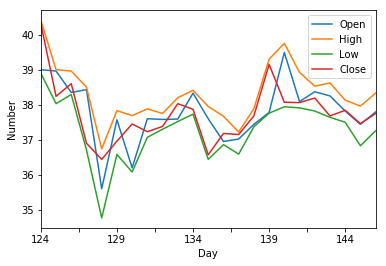

In [229]:
df_july = df[df['Date'].dt.month == 7]
df_july14 = df_july[df_july['Date'].dt.year == 2014]
average = df_july14.mean()
average.name = 'average'
df_avg_july14 = df_july14.append(average)
df_avg_july14.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Number")
plt.show()


We see a signicant drop following the 7/7/2014. I compared this to 2015 to see if this was a usual occurence. To ensure there wer no other conflating factors, I verified that there we no major airline crashes aroung the 7th July 2015

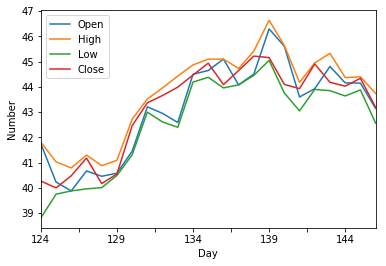

In [230]:
df_july = df[df['Date'].dt.month == 7]
df_july15 = df_july[df_july['Date'].dt.year == 2015]
average = df_july15.mean()
average.name = 'average'
df_avg_july15 = df_july15.append(average)
df_avg_july15.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Number")
plt.show()

We can see that the same significant drop did not occur the year after. We can conclude that the crash of Maylasia Airlines had a significant impact on stock prices of Delta Airlines.